In [66]:
import pandas as pd
import numpy as np
import gensim
from gensim import corpora, models
from gensim.utils import simple_preprocess
from gensim.parsing.preprocessing import STOPWORDS
from nltk.stem import WordNetLemmatizer, SnowballStemmer
from nltk.stem.porter import * 
import nltk
import matplotlib.pyplot as plt

In [2]:
nltk.download('wordnet')
np.random.seed(5757)


[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/ihsankahveci/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [6]:
documents = pd.read_csv('sermons_df', sep=';', index_col=0)
documents

,date,sermon
0,2019-02-01,\nDATE: 01.02.2019\n [pic]RIFQ (GENTLENE...
1,2018-03-02,\nLOCATION : NATIONWIDE\nDATE : 02.03.2018...
2,2019-12-27,\nDATE: 27.12.2019\n ...
3,2017-08-25,LOCATION\t: NATIONWIDE\n\n\tDATE\t: 25.08.2017...
4,2019-10-25,\nDATE: 25.10.2019\n[pic]\n\n FOR...
...,...,...
152,2019-04-12,\nDATE: 12.04.2019\n ...
153,2017-09-01,\nLOCATION : NATIONWIDE\nDATE : 01.09.2017...
154,2017-02-03,\n LOCATION : NATIONWIDE\n DATE : 03....
155,2019-08-23,\nDATE: 23.08.2019\n[pic]\n SOCIAL HARMS OF...


In [41]:
stemmer = SnowballStemmer('english')
custom_words = ['nationwide', 'location', 'date', 'allah']
def lemmatize_stemming(text):
    return stemmer.stem(WordNetLemmatizer().lemmatize(text, pos='v'))

def preprocess(text):
    result = []
    for token in gensim.utils.simple_preprocess(text):
        if token not in gensim.parsing.preprocessing.STOPWORDS and len(token) > 3 and token not in custom_words:
            result.append(lemmatize_stemming(token))
    return result

In [55]:
doc_sample = documents.sermon[57]

In [56]:
print('original document: ')
print(doc_sample)
print('\n\n tokenized and lemmatized document: ')
print(preprocess(doc_sample))

original document: 

LOCATION  : NATIONWIDE
DATE             : 13.01.2017

                                                                       [pic]

                   TO BE ABLE TO BE A SERVANT ALLAH LOVES

    A Blessed Friday to You, Brothers and Sisters!
    In the verse I have recited, Allah Almighty  shows  us  the  way  to  be
honored with His love and favor: "Say, [O Muhammad],  'If  you  should  love
Allah, then follow me, so Allah will love you and  forgive  you  your  sins.
And Allah is Forgiving and Merciful.'"[i]
    Brothers and Sisters!
    The Almighty stated the deeds that will move us away from His  grace  in
His Book like He showed us in it the ones that will bring us to  His  favor.
He stated the ones honored with His love as well as those left  without  His
love and mercy. Come, let's hear in today's khutbah  who  the  servants  our
Lord loves are.
    ?????????  ???????  ????????????????  Allah  loves  those  pure  in  the
spiritual and material sense.  Then  

In [44]:
processed_docs = documents['sermon'].map(preprocess)

In [57]:
processed_docs

0      [rifq, gentl, love, gracious, affair, honor, m...
1      [ethic, commerc, islam, jumu, mubarak, dear, b...
2      [life, contempl, honor, muslim, vers, recit, a...
3      [sacrific, search, close, honor, believ, lord,...
4      [soldier, mehmetcik, prayer, dear, muslim, ble...
                             ...                        
152    [iman, reflect, live, dear, muslim, iman, mean...
153    [manifest, faith, islam, refrain, frivol, thin...
154    [marriag, pact, agreement, oath, honor, believ...
155    [social, harm, dear, muslim, tenth, year, hijr...
156    [sincer, essenc, faith, honor, muslim, vers, r...
Name: sermon, Length: 157, dtype: object

In [58]:
dictionary = gensim.corpora.Dictionary(processed_docs)

In [59]:
count = 0
for k, v in dictionary.iteritems():
    print(k, v)
    count += 1
    if count > 10:
        break

0 abandon
1 adab
2 advis
3 affair
4 almighti
5 anger
6 angri
7 approach
8 attack
9 attempt
10 auster


In [ ]:
dictionary.filter_extremes(no_below=15, no_above=0.5, keep_n=100000)

In [60]:
bow_corpus = [dictionary.doc2bow(doc) for doc in processed_docs]
bow_corpus[57]

[(3, 1),
 (4, 6),
 (11, 3),
 (12, 2),
 (19, 2),
 (36, 1),
 (44, 1),
 (45, 1),
 (49, 1),
 (58, 2),
 (70, 1),
 (71, 2),
 (79, 1),
 (84, 3),
 (85, 2),
 (91, 1),
 (95, 1),
 (97, 4),
 (98, 2),
 (103, 1),
 (113, 3),
 (114, 2),
 (115, 23),
 (119, 1),
 (120, 3),
 (122, 1),
 (125, 1),
 (127, 2),
 (133, 4),
 (139, 2),
 (144, 1),
 (148, 1),
 (152, 2),
 (161, 1),
 (165, 1),
 (168, 1),
 (176, 1),
 (177, 2),
 (183, 1),
 (185, 1),
 (191, 1),
 (192, 1),
 (199, 1),
 (200, 1),
 (213, 3),
 (218, 5),
 (220, 8),
 (245, 1),
 (252, 2),
 (253, 1),
 (296, 3),
 (297, 1),
 (298, 5),
 (316, 2),
 (345, 4),
 (347, 1),
 (350, 7),
 (356, 1),
 (366, 1),
 (373, 2),
 (389, 1),
 (404, 1),
 (412, 9),
 (440, 2),
 (442, 1),
 (445, 2),
 (453, 1),
 (463, 1),
 (475, 2),
 (492, 3),
 (494, 1),
 (504, 3),
 (510, 1),
 (512, 1),
 (513, 3),
 (520, 1),
 (542, 1),
 (556, 2),
 (564, 1),
 (569, 1),
 (579, 1),
 (589, 1),
 (595, 1),
 (623, 1),
 (626, 3),
 (643, 1),
 (656, 1),
 (688, 4),
 (699, 2),
 (722, 2),
 (737, 1),
 (786, 1),
 (795, 2

In [61]:
bow_doc_57 = bow_corpus[57]

for i in range(len(bow_doc_57)):
    print("Word {} (\"{}\") appears {} time.".format(bow_doc_57[i][0], 
                                                     dictionary[bow_doc_57[i][0]], 
                                                     bow_doc_57[i][1]))

Word 3 ("affair") appears 1 time.
Word 4 ("almighti") appears 6 time.
Word 11 ("avoid") appears 3 time.
Word 12 ("away") appears 2 time.
Word 19 ("bestow") appears 2 time.
Word 36 ("construct") appears 1 time.
Word 44 ("dear") appears 1 time.
Word 45 ("deed") appears 1 time.
Word 49 ("director") appears 1 time.
Word 58 ("evil") appears 2 time.
Word 70 ("follow") appears 1 time.
Word 71 ("forgiv") appears 2 time.
Word 79 ("general") appears 1 time.
Word 84 ("good") appears 3 time.
Word 85 ("grace") appears 2 time.
Word 91 ("heart") appears 1 time.
Word 95 ("holi") appears 1 time.
Word 97 ("honor") appears 4 time.
Word 98 ("human") appears 2 time.
Word 103 ("imran") appears 1 time.
Word 113 ("like") appears 3 time.
Word 114 ("live") appears 2 time.
Word 115 ("love") appears 23 time.
Word 119 ("mean") appears 1 time.
Word 120 ("merci") appears 3 time.
Word 122 ("mind") appears 1 time.
Word 125 ("muhammad") appears 1 time.
Word 127 ("nation") appears 2 time.
Word 133 ("oppress") appears 4 

In [67]:
lda_model = gensim.models.LdaMulticore(bow_corpus, num_topics=20, id2word=dictionary, passes=2, workers=2)

In [68]:
for idx, topic in lda_model.print_topics(-1):
    print('Topic: {} \nWords: {}'.format(idx, topic))

Topic: 0 
Words: 0.017*"sacrific" + 0.012*"name" + 0.011*"life" + 0.011*"brother" + 0.011*"lord" + 0.011*"believ" + 0.010*"prophet" + 0.009*"sister" + 0.008*"peopl" + 0.008*"muslim"
Topic: 1 
Words: 0.015*"children" + 0.014*"prophet" + 0.013*"honor" + 0.013*"believ" + 0.012*"nation" + 0.010*"muslim" + 0.008*"çanakkal" + 0.007*"martyr" + 0.007*"wed" + 0.006*"homeland"
Topic: 2 
Words: 0.016*"believ" + 0.014*"prophet" + 0.012*"muslim" + 0.011*"right" + 0.009*"good" + 0.007*"peopl" + 0.007*"lord" + 0.007*"nation" + 0.007*"honor" + 0.006*"muhammad"
Topic: 3 
Words: 0.018*"believ" + 0.016*"muslim" + 0.014*"prophet" + 0.013*"good" + 0.011*"famili" + 0.009*"children" + 0.009*"dear" + 0.008*"life" + 0.008*"merci" + 0.008*"honor"
Topic: 4 
Words: 0.011*"believ" + 0.010*"muslim" + 0.008*"merci" + 0.008*"dear" + 0.008*"peopl" + 0.007*"prophet" + 0.007*"disast" + 0.007*"life" + 0.007*"honor" + 0.007*"famili"
Topic: 5 
Words: 0.015*"ramadan" + 0.015*"good" + 0.014*"month" + 0.010*"sister" + 0.010*"

In [69]:
print(processed_docs[57])

['abl', 'servant', 'love', 'bless', 'friday', 'brother', 'sister', 'vers', 'recit', 'almighti', 'show', 'honor', 'love', 'favor', 'muhammad', 'love', 'follow', 'love', 'forgiv', 'sin', 'forgiv', 'merci', 'brother', 'sister', 'almighti', 'state', 'deed', 'away', 'grace', 'book', 'like', 'show', 'one', 'bring', 'favor', 'state', 'one', 'honor', 'love', 'leav', 'love', 'merci', 'come', 'hear', 'today', 'khutbah', 'servant', 'lord', 'love', 'love', 'pure', 'spiritu', 'materi', 'sens', 'come', 'protect', 'disposit', 'evil', 'mind', 'heart', 'center', 'good', 'nice', 'thing', 'evil', 'ugli', 'love', 'repent', 'honor', 'brother', 'sister', 'come', 'servant', 'repent', 'voic', 'submiss', 'lord', 'remors', 'sin', 'refug', 'vast', 'merci', 'forget', 'repent', 'like', 'start', 'life', 'love', 'avoid', 'disobey', 'come', 'awar', 'duti', 'oblig', 'live', 'live', 'accord', 'purpos', 'reason', 'creation', 'love', 'trust', 'come', 'duti', 'suffic', 'great', 'truste', 'lose', 'hope', 'lord', 'grace', '

In [70]:
for index, score in sorted(lda_model[bow_corpus[57]], key=lambda tup: -1*tup[1]):
    print("\nScore: {}\t \nTopic: {}".format(score, lda_model.print_topic(index, 10)))


Score: 0.599785327911377	 
Topic: 0.019*"prophet" + 0.018*"lord" + 0.017*"believ" + 0.013*"brother" + 0.012*"life" + 0.010*"bless" + 0.010*"sister" + 0.009*"almighti" + 0.008*"holi" + 0.008*"honor"

Score: 0.39704397320747375	 
Topic: 0.016*"believ" + 0.014*"prophet" + 0.012*"honor" + 0.011*"sister" + 0.011*"peopl" + 0.010*"brother" + 0.009*"muslim" + 0.008*"world" + 0.008*"lord" + 0.008*"good"


In [72]:
def format_topics_sentences(ldamodel, corpus, texts):
    # Init output
    sent_topics_df = pd.DataFrame()

    # Get main topic in each document
    for i, row_list in enumerate(ldamodel[corpus]):
        row = row_list[0] if ldamodel.per_word_topics else row_list            
        # print(row)
        row = sorted(row, key=lambda x: (x[1]), reverse=True)
        # Get the Dominant topic, Perc Contribution and Keywords for each document
        for j, (topic_num, prop_topic) in enumerate(row):
            if j == 0:  # => dominant topic
                wp = ldamodel.show_topic(topic_num)
                topic_keywords = ", ".join([word for word, prop in wp])
                sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
            else:
                break
    sent_topics_df.columns = ['Dominant_Topic', 'Perc_Contribution', 'Topic_Keywords']

    # Add original text to the end of the output
    contents = pd.Series(texts)
    sent_topics_df = pd.concat([sent_topics_df, contents], axis=1)
    return(sent_topics_df)

In [74]:
df_topic_sents_keywords = format_topics_sentences(ldamodel=lda_model, corpus=bow_corpus, texts=processed_docs)

# Format
df_dominant_topic = df_topic_sents_keywords.reset_index()
df_dominant_topic.columns = ['Document_No', 'Dominant_Topic', 'Topic_Perc_Contrib', 'Keywords', 'Text']
df_dominant_topic.head(10)

,Document_No,Dominant_Topic,Topic_Perc_Contrib,Keywords,Text
0,0,3.0,0.5365,"believ, muslim, prophet, good, famili, childre...","[rifq, gentl, love, gracious, affair, honor, m..."
1,1,6.0,0.5304,"prophet, lord, believ, brother, life, bless, s...","[ethic, commerc, islam, jumu, mubarak, dear, b..."
2,2,3.0,0.9500,"believ, muslim, prophet, good, famili, childre...","[life, contempl, honor, muslim, vers, recit, a..."
3,3,0.0,0.8864,"sacrific, name, life, brother, lord, believ, p...","[sacrific, search, close, honor, believ, lord,..."
4,4,4.0,0.7559,"believ, muslim, merci, dear, peopl, prophet, d...","[soldier, mehmetcik, prayer, dear, muslim, ble..."
5,5,16.0,0.9974,"believ, knowledg, prophet, ramadan, read, hono...","[messag, revel, human, read, jumu, mubarak, ho..."
6,6,13.0,0.9978,"muslim, believ, prophet, prayer, life, brother...","[funer, etiquett, duti, travel, etern, life, j..."
7,7,11.0,0.5170,"believ, prophet, honor, sister, peopl, brother...","[worship, spiritu, world, jumu, mubarak, honor..."
8,8,11.0,0.6366,"believ, prophet, honor, sister, peopl, brother...","[preserv, famili, environ, righteous, peac, fu..."
9,9,18.0,0.9899,"muslim, believ, prophet, world, bless, honor, ...","[juli, rebirth, nation, jumu, mubarak, honor, ..."


In [75]:
import seaborn as sns
import matplotlib.colors as mcolors

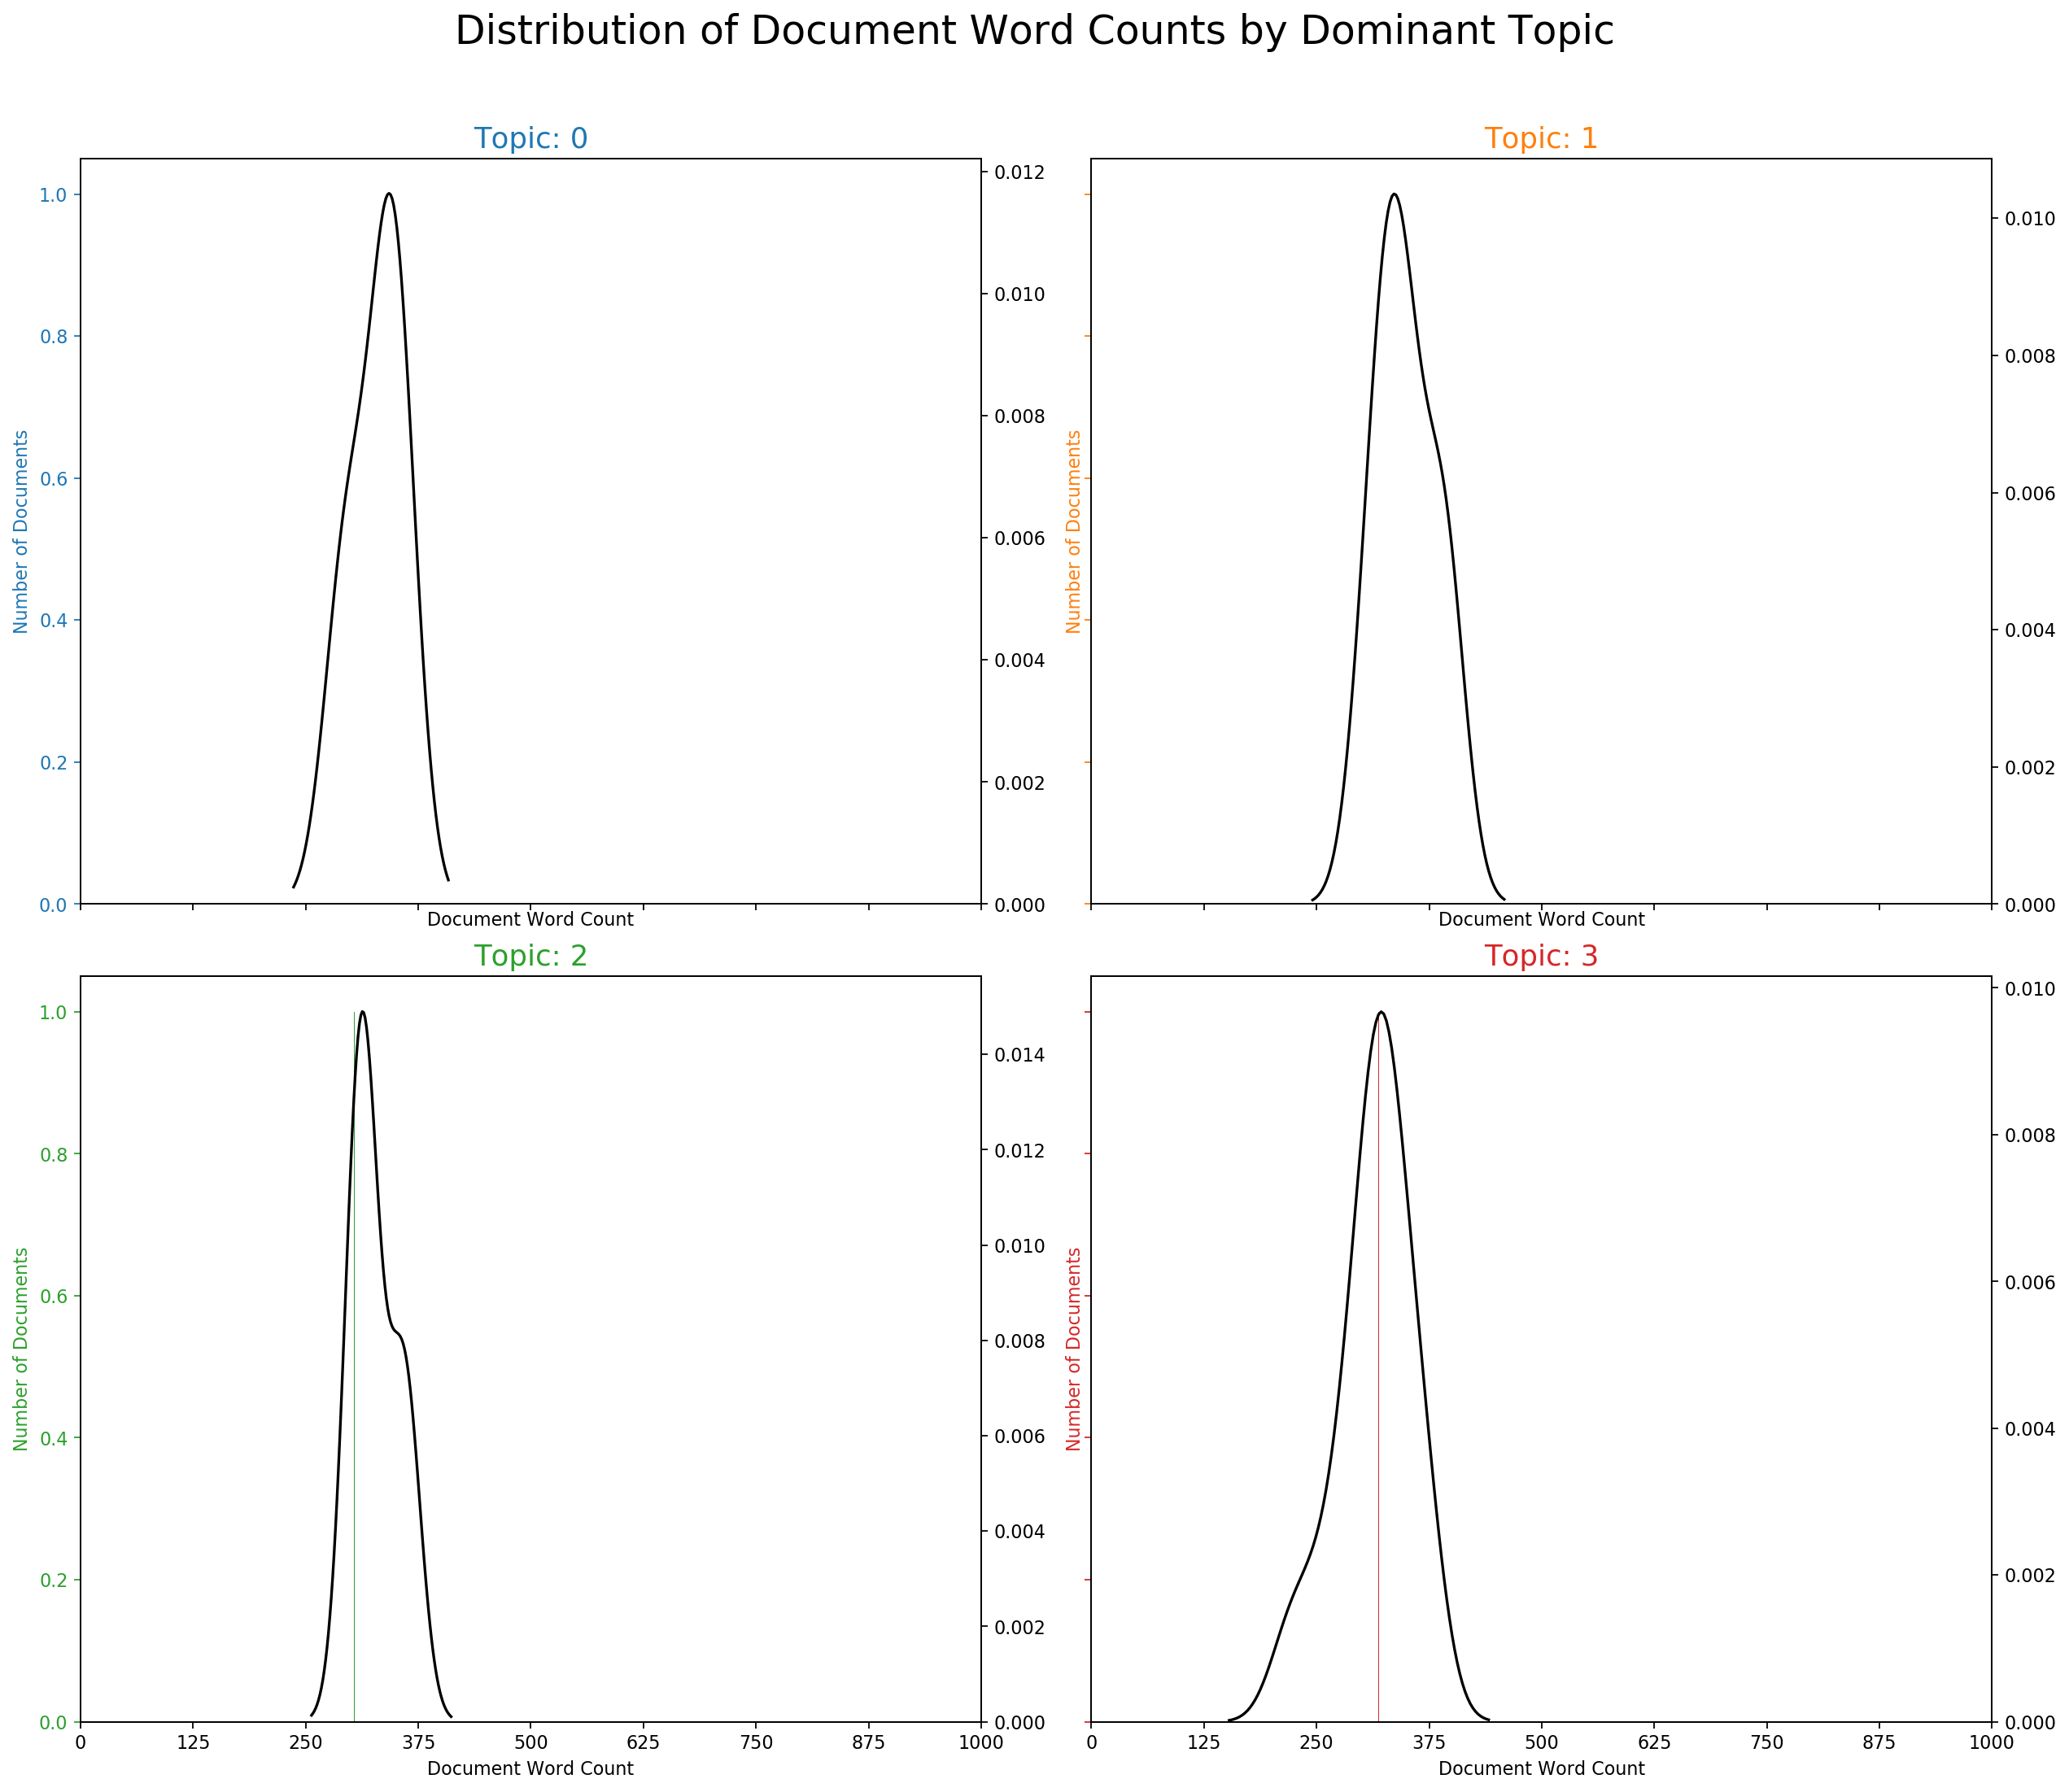

In [76]:
cols = [color for name, color in mcolors.TABLEAU_COLORS.items()]  # more colors: 'mcolors.XKCD_COLORS'

fig, axes = plt.subplots(2,2,figsize=(16,14), dpi=160, sharex=True, sharey=True)

for i, ax in enumerate(axes.flatten()):    
    df_dominant_topic_sub = df_dominant_topic.loc[df_dominant_topic.Dominant_Topic == i, :]
    doc_lens = [len(d) for d in df_dominant_topic_sub.Text]
    ax.hist(doc_lens, bins = 1000, color=cols[i])
    ax.tick_params(axis='y', labelcolor=cols[i], color=cols[i])
    sns.kdeplot(doc_lens, color="black", shade=False, ax=ax.twinx())
    ax.set(xlim=(0, 1000), xlabel='Document Word Count')
    ax.set_ylabel('Number of Documents', color=cols[i])
    ax.set_title('Topic: '+str(i), fontdict=dict(size=16, color=cols[i]))

fig.tight_layout()
fig.subplots_adjust(top=0.90)
plt.xticks(np.linspace(0,1000,9))
fig.suptitle('Distribution of Document Word Counts by Dominant Topic', fontsize=22)
plt.show()

In [77]:
import pyLDAvis.gensim
pyLDAvis.enable_notebook()

In [78]:
vis = pyLDAvis.gensim.prepare(lda_model, bow_corpus, dictionary=lda_model.id2word)
vis

/Users/ihsankahveci/miniconda3/envs/selenium/lib/python3.7/site-packages/pyLDAvis/_prepare.py:257: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  return pd.concat([default_term_info] + list(topic_dfs))


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
11     0.044608  0.001981       1        1  25.655014
13     0.045557  0.001569       2        1  18.063812
6      0.059071  0.037763       3        1  17.652367
3      0.057850  0.003051       4        1   7.932252
5      0.007845  0.066792       5        1   5.796163
1      0.007722 -0.054517       6        1   4.007106
7      0.029933 -0.066967       7        1   3.836997
2      0.017714 -0.018381       8        1   3.167694
12     0.026153 -0.019332       9        1   2.995264
9      0.026790  0.009167      10        1   2.124509
18    -0.011731 -0.013781      11        1   1.650173
4     -0.008090 -0.021985      12        1   1.621917
0     -0.001189  0.002563      13        1   1.504789
16    -0.005160  0.030499      14        1   1.110080
15    -0.039282  0.055049      15        1   0.817362
17    -0.007700  0.009257      16        1   0.787635
8     -0.025527 -0.002640      17        1   0.631192
14    -0.088771 -0.013123      18        1   0.586878
10    -0.039490  0.001259      19        1   0.043881
19    -0.096299 -0.008226      20        1   0.014911, topic_info=    Category        Freq     Term       Total  loglift  logprob
18   Default  781.000000   believ  781.000000  30.0000  30.0000
84   Default  485.000000     good  485.000000  29.0000  29.0000
144  Default  697.000000  prophet  697.000000  28.0000  28.0000
126  Default  586.000000   muslim  586.000000  27.0000  27.0000
220  Default  468.000000  brother  468.000000  26.0000  26.0000
..       ...         ...      ...         ...      ...      ...
114  Topic20    0.016843     live  325.808807  -1.0593  -6.1417
323  Topic20    0.015693   prayer  272.616272  -0.9518  -6.2124
218  Topic20    0.014736    bless  304.522247  -1.1254  -6.2753
98   Topic20    0.013505    human  250.751724  -1.0184  -6.3626
84   Topic20    0.013854     good  485.319153  -1.6532  -6.3371

[1495 rows x 6 columns], token_table=      Topic      Freq      Term
term                           
3693      2  0.704898     abash
1520      3  0.755679   abolish
2716      1  0.359858     accid
2716      3  0.179929     accid
2716     14  0.179929     accid
...     ...       ...       ...
1246      2  0.156345  çanakkal
1246      4  0.031269  çanakkal
1246      5  0.031269  çanakkal
1246      6  0.531574  çanakkal
1246     11  0.031269  çanakkal

[3851 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[12, 14, 7, 4, 6, 2, 8, 3, 13, 10, 19, 5, 1, 17, 16, 18, 9, 15, 11, 20])

In [79]:
topics_for_docs = {}
for doc_num, document in enumerate(lda_model.get_document_topics(bow_corpus, minimum_probability=0)):
    topics_for_docs[doc_num] = {str(x[0]): x[1] for x in document}
    #list_of_dfs.append(pd.DataFrame())
    
topics_for_docs   


{0: {'0': 0.00015300338,
  '1': 0.00015300338,
  '2': 0.00015300338,
  '3': 0.5365245,
  '4': 0.00015300338,
  '5': 0.00015300338,
  '6': 0.00015300338,
  '7': 0.00015300338,
  '8': 0.00015300338,
  '9': 0.00015300338,
  '10': 0.00015300338,
  '11': 0.4607215,
  '12': 0.00015300338,
  '13': 0.00015300338,
  '14': 0.00015300338,
  '15': 0.00015300338,
  '16': 0.00015300338,
  '17': 0.00015300338,
  '18': 0.00015300338,
  '19': 0.00015300338},
 1: {'0': 0.00013677505,
  '1': 0.00013677505,
  '2': 0.00013677505,
  '3': 0.00013677505,
  '4': 0.00013677505,
  '5': 0.00013677505,
  '6': 0.5304374,
  '7': 0.00013677505,
  '8': 0.00013677505,
  '9': 0.00013677505,
  '10': 0.00013677505,
  '11': 0.46710062,
  '12': 0.00013677505,
  '13': 0.00013677505,
  '14': 0.00013677505,
  '15': 0.00013677505,
  '16': 0.00013677505,
  '17': 0.00013677505,
  '18': 0.00013677505,
  '19': 0.00013677505},
 2: {'0': 0.00013701386,
  '1': 0.00013701386,
  '2': 0.00013701386,
  '3': 0.95050776,
  '4': 0.0001370138

In [80]:
pd.DataFrame(topics_for_docs).transpose()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,0.000153,0.000153,0.000153,0.536524,0.000153,0.000153,0.000153,0.000153,0.000153,0.000153,0.000153,0.460721,0.000153,0.000153,0.000153,0.000153,0.000153,0.000153,0.000153,0.000153
1,0.000137,0.000137,0.000137,0.000137,0.000137,0.000137,0.530437,0.000137,0.000137,0.000137,0.000137,0.467101,0.000137,0.000137,0.000137,0.000137,0.000137,0.000137,0.000137,0.000137
2,0.000137,0.000137,0.000137,0.950508,0.000137,0.047026,0.000137,0.000137,0.000137,0.000137,0.000137,0.000137,0.000137,0.000137,0.000137,0.000137,0.000137,0.000137,0.000137,0.000137
3,0.885521,0.000146,0.000146,0.000146,0.000146,0.000146,0.000146,0.000146,0.000146,0.000146,0.000146,0.111854,0.000146,0.000146,0.000146,0.000146,0.000146,0.000146,0.000146,0.000146
4,0.000122,0.000122,0.000122,0.000122,0.755462,0.000122,0.000122,0.002626,0.000122,0.000122,0.000122,0.033064,0.000122,0.000122,0.206891,0.000122,0.000122,0.000122,0.000122,0.000122
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
152,0.000153,0.000153,0.000153,0.000153,0.000153,0.000153,0.000153,0.000153,0.000153,0.000153,0.000153,0.063522,0.000153,0.933724,0.000153,0.000153,0.000153,0.000153,0.000153,0.000153
153,0.000146,0.000146,0.000146,0.000146,0.000146,0.000146,0.416734,0.000146,0.000146,0.100407,0.000146,0.000146,0.000146,0.480379,0.000146,0.000146,0.000146,0.000146,0.000146,0.000146
154,0.000143,0.000143,0.000143,0.000143,0.000143,0.000143,0.000143,0.000143,0.000143,0.000143,0.000143,0.556679,0.000143,0.000143,0.000143,0.440741,0.000143,0.000143,0.000143,0.000143
155,0.000130,0.000130,0.000130,0.000130,0.000130,0.000130,0.374073,0.000130,0.000130,0.000130,0.000130,0.000130,0.000130,0.623587,0.000130,0.000130,0.000130,0.000130,0.000130,0.000130
